In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:

df = pd.read_csv('preprocessed_data.csv')
df.head()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M
0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,False
1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,False
2,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,False
3,28,3.0,2.0,NaN,0.0,1588,0.803,1.105,True
4,18,3.0,2.0,NaN,0.0,1737,0.848,1.010,True


In [22]:
print("\nCSV shape (rows, columns):", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe(include='all'))


CSV shape (rows, columns): (436, 9)

Column names: ['Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'M/F_M']

Data types:
 Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
M/F_M       bool
dtype: object

Summary statistics:
                Age        Educ         SES       MMSE        CDR         eTIV  \
count   436.000000  436.000000  436.000000  235.00000  436.00000   436.000000   
unique         NaN         NaN         NaN        NaN        NaN          NaN   
top            NaN         NaN         NaN        NaN        NaN          NaN   
freq           NaN         NaN         NaN        NaN        NaN          NaN   
mean     51.357798    3.096330    2.243119   27.06383    0.15367  1481.919725   
std      25.269862    0.966037    0.825219    3.69687    0.31515   158.740866   
min      18.000000    1.000000    1.000000   14.00000    0.00000  1123.000000   
25%      23.000000    3.000


Missing values per column:
Age        0
Educ       0
SES        0
MMSE     201
CDR        0
eTIV       0
nWBV       0
ASF        0
M/F_M      0
dtype: int64


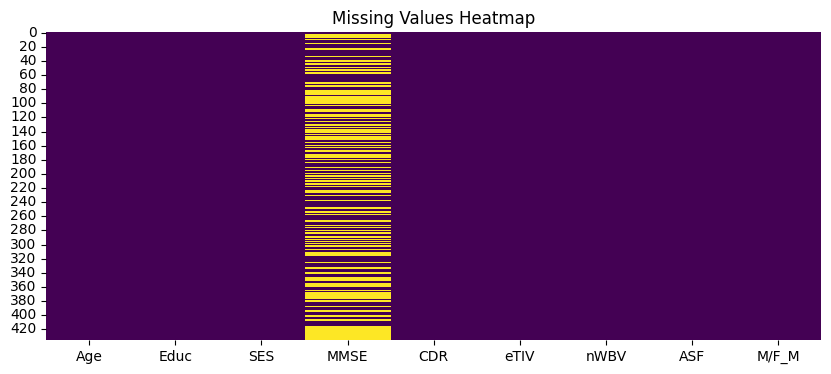


Number of duplicate rows: 0


In [23]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Visualize missing values (optional)
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

In [24]:

df['MMSE'] = df['MMSE'].fillna(df['MMSE'].median())

df.head()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_M
0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,False
1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,False
2,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,False
3,28,3.0,2.0,29.0,0.0,1588,0.803,1.105,True
4,18,3.0,2.0,29.0,0.0,1737,0.848,1.010,True


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Convert categorical columns to binary
df = pd.get_dummies(df, drop_first=True)

# Separate features & target variable
X = df.drop(columns=["Age"])  # Features
y = df["Age"]  # Target variable

# Normalize features (important for SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVR model
svr = SVR(kernel="rbf", C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on test set
y_pred = svr.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"SVR Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


SVR Model Performance:
Mean Squared Error (MSE): 146.11
R² Score: 0.79


In [30]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE:{mae}")

MAE:10.551129350594572
